# Linearna regresija


### Libraries

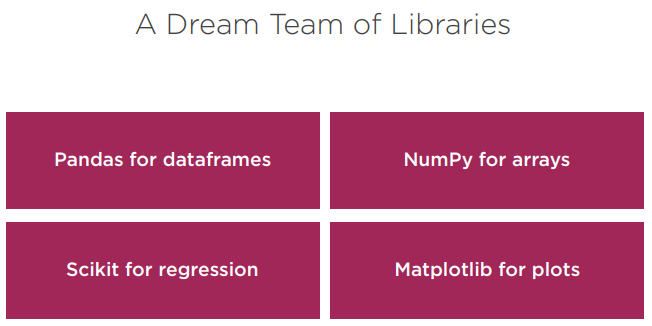

In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

###Data (Numpy&Pandas)

In [ ]:
my_list = [[1,0.5],[2,2.5],[3,2.0],[4,4.0],[5,3.5],[6,6.0],[7,5.5]]
print(my_list)
my_array = np.array(my_list)
print(my_array)
df = pd.DataFrame(my_array, columns = ['x','y'])
print(df)

[[1, 0.5], [2, 2.5], [3, 2.0], [4, 4.0], [5, 3.5], [6, 6.0], [7, 5.5]]
[[1.  0.5]
 [2.  2.5]
 [3.  2. ]
 [4.  4. ]
 [5.  3.5]
 [6.  6. ]
 [7.  5.5]]
     x    y
0  1.0  0.5
1  2.0  2.5
2  3.0  2.0
3  4.0  4.0
4  5.0  3.5
5  6.0  6.0
6  7.0  5.5


###Pseudo Code Example

In [ ]:
sumx = 0
sumy = 0
sumxy = 0
sumx2 = 0
n = df.shape[0]

for i, row in df.iterrows():
    sumx = sumx + row['x']
    sumy = sumy + row['y']
    sumxy = sumxy + row['x']*row['y']
    sumx2 = sumx2 + row['x']*row['x']

xm = sumx/n
ym = sumy/n
a1 = (n*sumxy - sumx*sumy)/(n*sumx2 - sumx*sumx)
a0 = ym - a1*xm

print(a0.round(8), a1.round(7))

0.07142857 0.8392857


In [ ]:
st = 0
sr = 0
for i, row in df.iterrows():
    st = st + (row['y']-ym)**2
    sr = sr + (row['y'] - a1*row['x'] - a0)**2

import math
syx = math.sqrt(sr/(n-2))
r2 = (st-sr)/st
print(r2.round(3))
print(round(math.sqrt(r2),3))

0.868
0.932


###Scikit Learn

In [ ]:
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
lm.fit(my_array[:, 0].reshape(-1,1), my_array[:, 1])

print(my_array[:, 0])
print(my_array[:, 0].reshape(-1,1))

print("\n", lm.coef_)

[1. 2. 3. 4. 5. 6. 7.]
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]]

 [0.83928571]


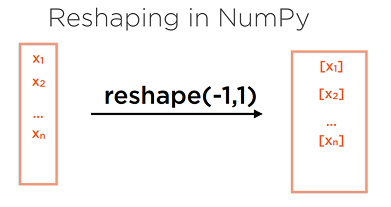

In [ ]:
xData = np.array(df['x']).reshape(-1,1)
yData = np.array(df['y'])
print(xData)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]]


In [ ]:
print(yData)

[0.5 2.5 2.  4.  3.5 6.  5.5]


In [ ]:
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
lm.fit(xData,yData)

print(lm.coef_[0])

0.8392857142857143


In [ ]:
lm.intercept_

0.07142857142857117

In [ ]:
lm.score(xData, yData)

0.8683176100628931

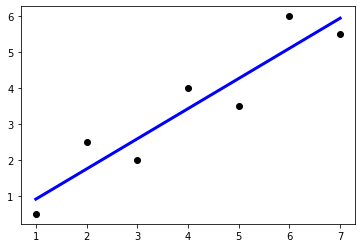

In [ ]:
plt.scatter(xData, yData,  color='black')
plt.plot(xData, lm.predict(xData), color='blue',
         linewidth=3)
plt.show()

In [ ]:
print(lm.predict([[0], [20]]))

[ 0.07142857 16.85714286]


In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(df[['x']], df[['y']])

print("Coef:", lr.coef_, "\nIntercept:", lr.intercept_)

Coef: [[0.83928571]] 
Intercept: [0.07142857]


In [ ]:
lm.score(df[['x']], df[['y']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8683176100628931

###Seaborn

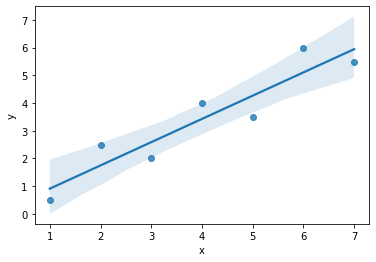

In [ ]:
sns.regplot(x='x', y='y', data=df)

###NumPy

In [ ]:
x = np.array(df['x'])
y = np.array(df['y'])

In [ ]:
[a,b]=np.polyfit(x,y,1)
a.round(7)

0.8392857

In [ ]:
b.round(8)

0.07142857

###Matplotlib

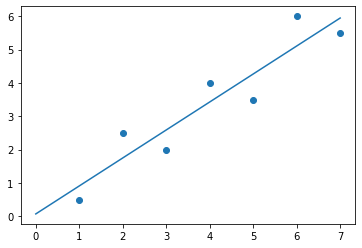

In [ ]:
plt.scatter (x,y)
plt.plot ([0,7],[b,a*7+b])
plt.show()

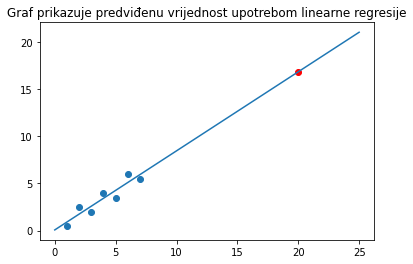

16.857142857142854


In [ ]:
plt.scatter (x,y)
plt.scatter (20, a*20+b, color ='red')
plt.plot ([0,25],[b,25*a+b])
plt.title('Graf prikazuje predviđenu vrijednost upotrebom linearne regresije')
plt.show ()

print (a*20+b)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, a*x+b)

0.8683176100628931

###Statsmodels

In [ ]:
import statsmodels.api as sm
x = df.x
y = df.y
x = sm.add_constant(x)

lm = sm.OLS(y, x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     32.97
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00225
Time:                        12:31:07   Log-Likelihood:                -6.9566
No. Observations:                   7   AIC:                             17.91
Df Residuals:                       5   BIC:                             17.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0714      0.654      0.109      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


##Primjer

Coefficients: 
 [998.57768914]
Coefficient of determination: 0.23


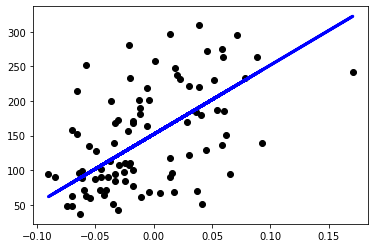

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X = df[['bmi']]

# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state= 42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)



plt.show()